In [1]:
import numpy as np
import pandas as pd

In [7]:
train = pd.read_csv("../data/bike_dataset/train.csv", parse_dates=["datetime"])
test = pd.read_csv("../data/bike_dataset/test.csv", parse_dates=["datetime"])

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:xlabel='weather', ylabel='count'>

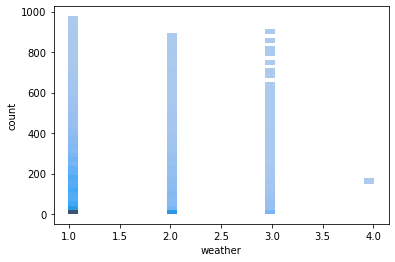

In [19]:
# weather가 4인 경우 (Heavy rain + Ice Pallets) -> Rental count가 적다.

sns.histplot(x="weather", y="count", data=train)

<AxesSubplot:xlabel='season', ylabel='count'>

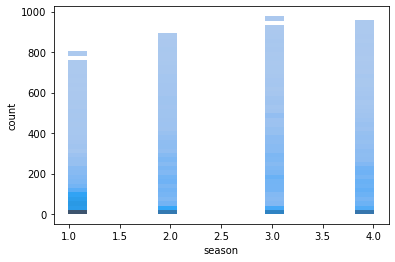

In [30]:
# seaon별 렌트 갯수 분류

sns.histplot(x="season", y="count", data=train)

<AxesSubplot:xlabel='temp', ylabel='count'>

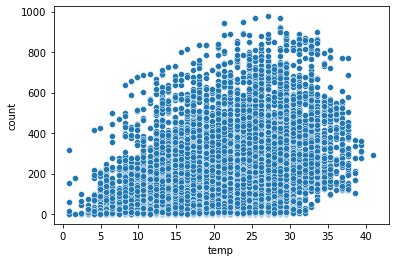

In [28]:
sns.scatterplot(x="temp", y="count", data=train)

<AxesSubplot:xlabel='weather', ylabel='count'>

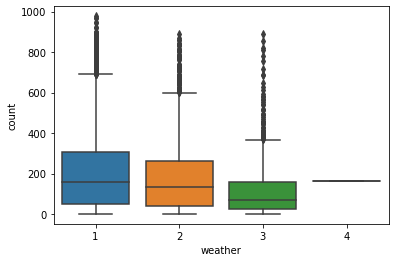

In [29]:
sns.boxplot(x="weather", y="count", data=train)

In [36]:
train["datetime"][0]

Timestamp('2011-01-01 00:00:00')

In [50]:
test = train["datetime"][0]
str(test).split(" ")[1]

'00:00:00'

In [51]:
train["hour_column"] = train["datetime"].apply(lambda x: str(x).split(" ")[1])

In [54]:
train["hour_column"].head(15)

0     00:00:00
1     01:00:00
2     02:00:00
3     03:00:00
4     04:00:00
5     05:00:00
6     06:00:00
7     07:00:00
8     08:00:00
9     09:00:00
10    10:00:00
11    11:00:00
12    12:00:00
13    13:00:00
14    14:00:00
Name: hour_column, dtype: object

In [57]:
# datetime은 언제부터 언제까지 데이터인가?  2011-01-01 00:00:00 부터 2012-12-19-23:00:00
print(train["datetime"].min())
print(train["datetime"].max())
train.tail()

2011-01-01 00:00:00
2012-12-19 23:00:00


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_column
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19:00:00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20:00:00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21:00:00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22:00:00
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23:00:00


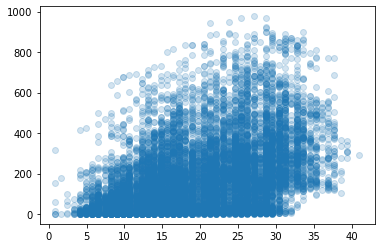

In [61]:
# count와 temp는 어떤 상관관계가 있을까?

plt.scatter(x="temp", y="count", data=train, alpha=0.2)
plt.show()

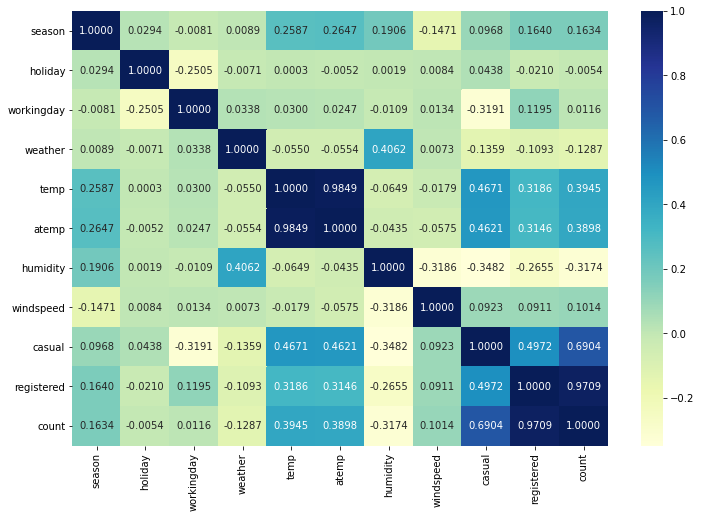

In [17]:
# corr()를 활용하여 히트맵 만들기

plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt=".4f", cmap='YlGnBu')
plt.show()

<AxesSubplot:>

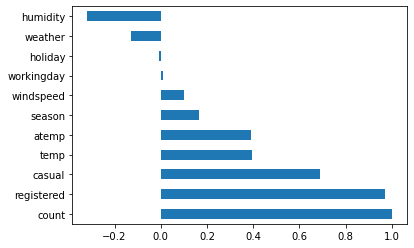

In [105]:
correlation = train.corr()
correaltion_sorted = correlation.sort_values(by="count", ascending=False)
correaltion_sorted["count"].plot(kind="barh")

<AxesSubplot:xlabel='season', ylabel='count'>

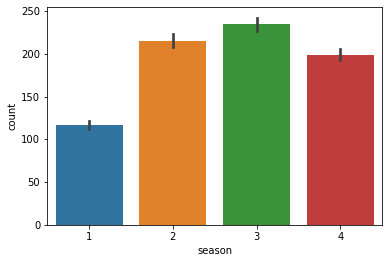

In [63]:
# 계절별 데이터를 확인 및 시각화

sns.barplot(x="season", y="count", data=train)

In [108]:
# 쉬는날과 아닌날의 데이터는 얼마나 될까?

print(train.groupby("holiday")["count"].count())

holiday
0    10575
1      311
Name: count, dtype: int64


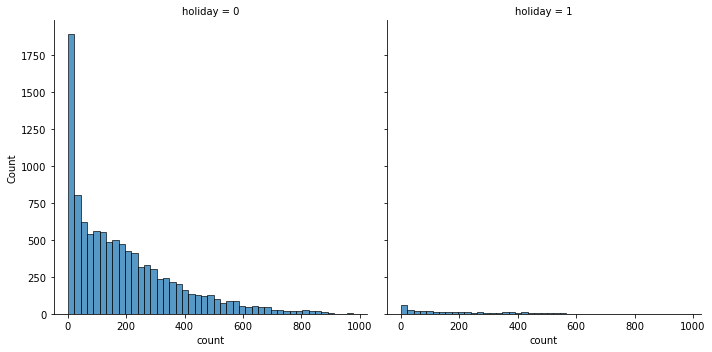

In [79]:
sns.displot(train, x="count", col="holiday", )

In [80]:
# 날씨는 어떤 값을 갖고, 각가의 데이터의 수는 얼마나 될까?

train.groupby("weather").count()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour_column
weather,,,,,,,,,,,,
1,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
2,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
3,859,859,859,859,859,859,859,859,859,859,859,859
4,1,1,1,1,1,1,1,1,1,1,1,1


weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


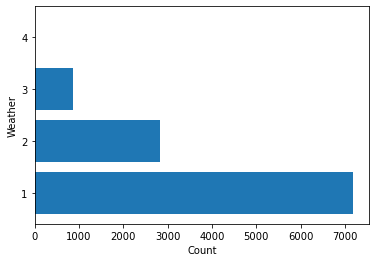

In [97]:
weather_count_group = train.groupby("weather")["count"].count()
print(weather_count_group)
plt.barh(weather_count_group.index, weather_count_group.values)
plt.xlabel("Count")
plt.ylabel("Weather")
plt.yticks(weather_count_group.index)
plt.show()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64